In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/DiplomadoEPM_2019/master/Modulo3/init.py
from init import init; init(force_download=False)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import *
from local.lib import mlutils
tf.__version__

'2.1.0'

## Usamos `MNIST`

In [2]:
from tensorflow.keras import datasets

In [3]:
(Xtr, ytr), (Xts, yts) = datasets.mnist.load_data()

Xtr = Xtr/255
Xts = Xts/255
Xtr.shape, ytr.shape, Xts.shape, yts.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

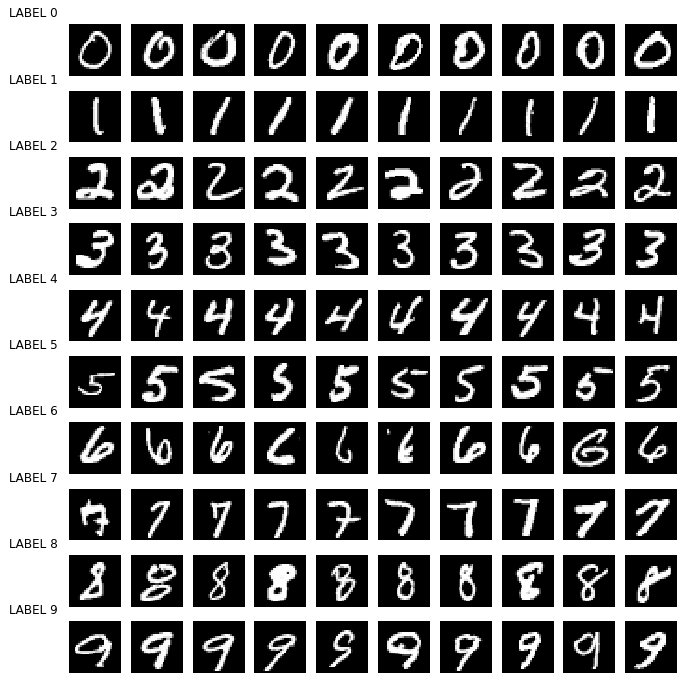

In [4]:
mlutils.show_labeled_image_mosaic(Xtr, ytr)

## Tarea objetivo

queremos una red 

- que acepte **DOS IMÁGENES** de entrada
- emita una salida binaria: 
    - 0 si las imágenes representan un número distinto
    - 1 si representan el mismo número

Antes, nuestro dataset de entrenamiento (y el de test) estaba compuesto por un conjunto de objetos, en el que cada objeto era una imagen (`X`) y la clase del mismo (`y`, entre 0 y 9).

Ahora, los objetos de nuestro dataset estarán conformados por:

- un par de imágenes
- la clase correspondiente a ese par de imágenes (0 si son el mismo número y 1 si no)

**La siguiente función nos prepara los datasets de esta manera**, emparejando aleatoriamente imágenes con otras iguales y con otras distintas.

In [5]:
def build_image_pairs(X,y):
    eX = [[],[]]
    ey = []
    for i in range(10):
        print (i, end=" ")
        l = np.sum(y==i)
        k = np.sum(y!=i)
        cX = X[y==i][np.random.permutation(l)]
        p0 = cX[:l//2]
        p1 = cX[-len(p0):]

        eX[0] += list(p0)
        eX[1] += list(p1)
        ey += [1]*len(p1)
        eX[0] += list(p1)
        eX[1] += list(X[y!=i][np.random.permutation(k)[:len(p1)]])
        ey += [0]*len(p1)

    eX = [np.r_[eX[0]], np.r_[eX[1]]]
    ey = np.r_[ey]
    return eX, ey

In [21]:
eXtr, eytr = build_image_pairs(Xtr, ytr)
eXts, eyts = build_image_pairs(Xts, yts)

0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 

observa y entiende la estructura del nuevo dataset

In [7]:
[i.shape for i in eXtr], eytr.shape

([(59994, 28, 28), (59994, 28, 28)], (59994,))

In [8]:
print ("class distribution %.2f::%.2f"%(np.mean(eytr), 1-np.mean(eytr)))

class distribution 0.50::0.50


algunas muestras del nuevo dataset

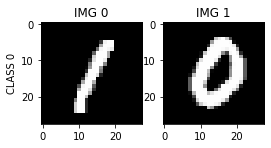

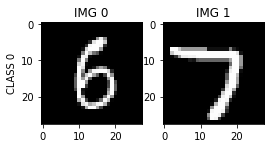

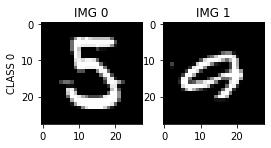

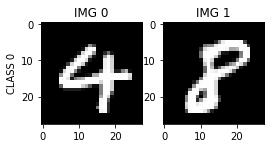

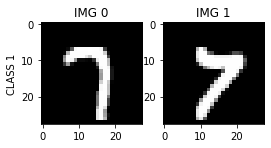

In [9]:
for _ in range(5):
    i = np.random.randint(len(eXtr[0]))
    plt.figure(figsize=(4,2))
    plt.subplot(121)
    plt.imshow(eXtr[0][i], cmap=plt.cm.Greys_r); 
    plt.ylabel("CLASS %d"%(eytr[i]))
    plt.title("IMG 0")
    plt.subplot(122)
    plt.imshow(eXtr[1][i], plt.cm.Greys_r); 
    plt.title("IMG 1")


## TALLER: crea la siguiente arquitectura de red

- todas las capas con activación `relu`, excepto la última (con una neurona) y activación `sigmoid`

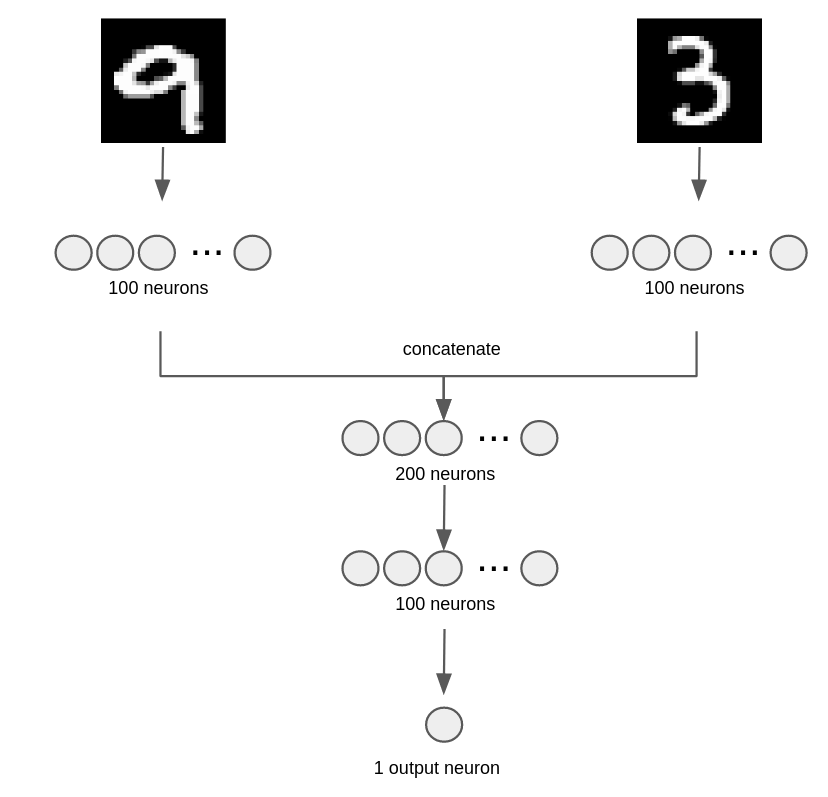

In [10]:
from IPython.display import Image
Image(filename='local/imgs/two-inputs.png', width=600)

### el modelo debería de tener la siguiente estructura y parámetros

    Model: "model_1"
    __________________________________________________________________________________________________
    Layer (type)                    Output Shape         Param #     Connected to                     
    ==================================================================================================
    input_img1 (InputLayer)         [(None, 28, 28)]     0                                            
    __________________________________________________________________________________________________
    input_img2 (InputLayer)         [(None, 28, 28)]     0                                            
    __________________________________________________________________________________________________
    flatten_img1 (Flatten)          (None, 784)          0           input_img1[0][0]                 
    __________________________________________________________________________________________________
    flatten_img2 (Flatten)          (None, 784)          0           input_img2[0][0]                 
    __________________________________________________________________________________________________
    layer1_img1 (Dense)             (None, 100)          78500       flatten_img1[0][0]               
    __________________________________________________________________________________________________
    layer1_img2 (Dense)             (None, 100)          78500       flatten_img2[0][0]               
    __________________________________________________________________________________________________
    tf_op_layer_concat_1 (TensorFlo [(None, 200)]        0           layer1_img1[0][0]                
                                                                     layer1_img2[0][0]                
    __________________________________________________________________________________________________
    layer2_common (Dense)           (None, 100)          20100       tf_op_layer_concat_1[0][0]       
    __________________________________________________________________________________________________
    output (Dense)                  (None, 1)            101         layer2_common[0][0]              
    ==================================================================================================
    Total params: 177,201
    Trainable params: 177,201
    Non-trainable params: 0
    __________________________________________________________________________________________________


y el _accuracy_ debería de estar por encima del 95% tanto en train como test

In [11]:
inputs1  = ...
inputs2  = ...

...

model = ...

model.compile(optimizer="adam",
              loss=tf.keras.losses.mean_squared_error,
              metrics=['accuracy'])

In [25]:
# descomenta estas lineas si quieres ver la solucion
# sol = [10, 105, 110, 112, 117, 116, 115, 49, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 73, 110, 112, 117, 116, 40, 115, 104, 97, 112, 101, 61, 88, 116, 114, 46, 115, 104, 97, 112, 101, 91, 49, 58, 93, 44, 32, 110, 97, 109, 101, 61, 34, 105, 110, 112, 117, 116, 95, 105, 109, 103, 49, 34, 41, 10, 108, 97, 121, 101, 114, 49, 32, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 70, 108, 97, 116, 116, 101, 110, 40, 100, 116, 121, 112, 101, 61, 116, 102, 46, 102, 108, 111, 97, 116, 51, 50, 44, 32, 110, 97, 109, 101, 61, 34, 102, 108, 97, 116, 116, 101, 110, 95, 105, 109, 103, 49, 34, 41, 40, 105, 110, 112, 117, 116, 115, 49, 41, 10, 108, 97, 121, 101, 114, 49, 32, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 68, 101, 110, 115, 101, 40, 49, 48, 48, 44, 32, 97, 99, 116, 105, 118, 97, 116, 105, 111, 110, 61, 34, 114, 101, 108, 117, 34, 44, 32, 110, 97, 109, 101, 61, 34, 108, 97, 121, 101, 114, 49, 95, 105, 109, 103, 49, 34, 41, 40, 108, 97, 121, 101, 114, 49, 41, 10, 10, 105, 110, 112, 117, 116, 115, 50, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 73, 110, 112, 117, 116, 40, 115, 104, 97, 112, 101, 61, 88, 116, 114, 46, 115, 104, 97, 112, 101, 91, 49, 58, 93, 44, 32, 110, 97, 109, 101, 61, 34, 105, 110, 112, 117, 116, 95, 105, 109, 103, 50, 34, 41, 10, 108, 97, 121, 101, 114, 50, 32, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 70, 108, 97, 116, 116, 101, 110, 40, 100, 116, 121, 112, 101, 61, 116, 102, 46, 102, 108, 111, 97, 116, 51, 50, 44, 32, 110, 97, 109, 101, 61, 34, 102, 108, 97, 116, 116, 101, 110, 95, 105, 109, 103, 50, 34, 41, 40, 105, 110, 112, 117, 116, 115, 50, 41, 10, 108, 97, 121, 101, 114, 50, 32, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 68, 101, 110, 115, 101, 40, 49, 48, 48, 44, 32, 97, 99, 116, 105, 118, 97, 116, 105, 111, 110, 61, 34, 114, 101, 108, 117, 34, 44, 32, 110, 97, 109, 101, 61, 34, 108, 97, 121, 101, 114, 49, 95, 105, 109, 103, 50, 34, 41, 40, 108, 97, 121, 101, 114, 50, 41, 10, 10, 108, 97, 121, 101, 114, 32, 61, 32, 116, 102, 46, 99, 111, 110, 99, 97, 116, 40, 91, 108, 97, 121, 101, 114, 49, 44, 32, 108, 97, 121, 101, 114, 50, 93, 44, 32, 97, 120, 105, 115, 61, 49, 41, 10, 10, 108, 97, 121, 101, 114, 32, 32, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 68, 101, 110, 115, 101, 40, 49, 48, 48, 44, 32, 97, 99, 116, 105, 118, 97, 116, 105, 111, 110, 61, 34, 114, 101, 108, 117, 34, 44, 32, 110, 97, 109, 101, 61, 34, 108, 97, 121, 101, 114, 50, 95, 99, 111, 109, 109, 111, 110, 34, 41, 40, 108, 97, 121, 101, 114, 41, 10, 111, 117, 116, 112, 117, 116, 115, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 108, 97, 121, 101, 114, 115, 46, 68, 101, 110, 115, 101, 40, 49, 44, 32, 97, 99, 116, 105, 118, 97, 116, 105, 111, 110, 61, 34, 115, 105, 103, 109, 111, 105, 100, 34, 44, 32, 110, 97, 109, 101, 61, 34, 111, 117, 116, 112, 117, 116, 34, 41, 40, 108, 97, 121, 101, 114, 41, 10, 10, 109, 111, 100, 101, 108, 32, 61, 32, 116, 102, 46, 107, 101, 114, 97, 115, 46, 77, 111, 100, 101, 108, 40, 105, 110, 112, 117, 116, 115, 61, 91, 105, 110, 112, 117, 116, 115, 49, 44, 32, 105, 110, 112, 117, 116, 115, 50, 93, 44, 32, 111, 117, 116, 112, 117, 116, 115, 61, 111, 117, 116, 112, 117, 116, 115, 41, 10]
# print ("".join([chr(i) for i in sol]))

In [ ]:
model.summary()

In [ ]:
model.fit(eXtr, eytr, epochs=5)

In [34]:
preds_tr = (model.predict(eXtr)[:,0]>.5).astype(int)
print ("accuracy in train %.2f"%np.mean(preds_tr==eytr))

accuracy in train 0.96


In [36]:
preds_ts = (model.predict(eXts)[:,0]>.5).astype(int)
print ("accuracy in test %.2f"%np.mean(preds_ts==eyts))

accuracy in test 0.96


algunos ejemplos de predicción

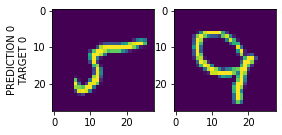

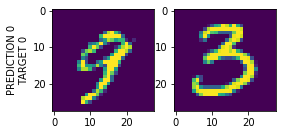

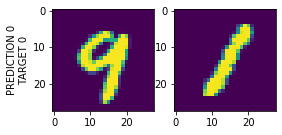

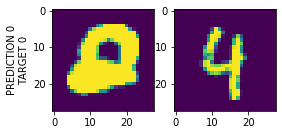

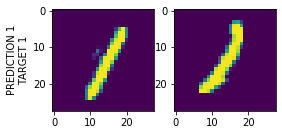

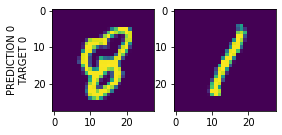

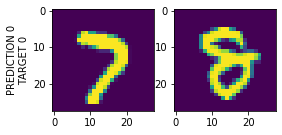

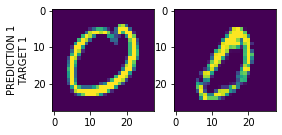

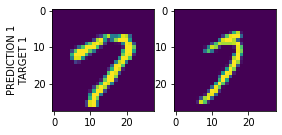

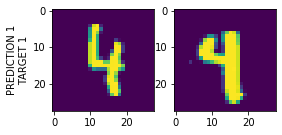

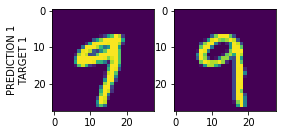

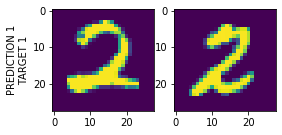

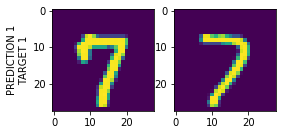

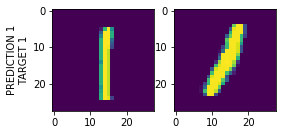

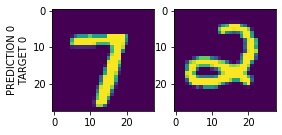

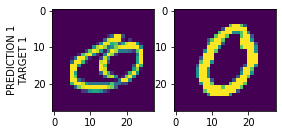

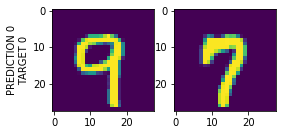

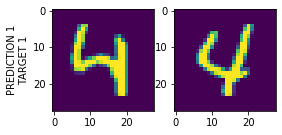

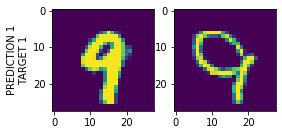

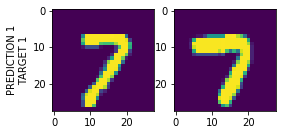

In [37]:
for _ in range(20):
    i = np.random.randint(len(eXts[0]))
    plt.figure(figsize=(4,2))
    plt.subplot(121)
    plt.imshow(eXts[0][i])
    plt.ylabel("PREDICTION %d\nTARGET %d"%(preds_ts[i], eyts[i]))
    plt.subplot(122)
    plt.imshow(eXts[1][i])
